In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter
style.use('fivethirtyeight')
import pandas as pd
import random

In [17]:
df = pd.read_csv('iris')
df.replace('Iris-setosa',2,inplace=True)
df.replace('Iris-versicolor',3,inplace=True)
df.replace('Iris-virginica',4,inplace=True)
full_data = df.astype(float).values.tolist()

In [18]:
full_data

[[4.9, 3.0, 1.4, 0.2, 2.0],
 [4.7, 3.2, 1.3, 0.2, 2.0],
 [4.6, 3.1, 1.5, 0.2, 2.0],
 [5.0, 3.6, 1.4, 0.2, 2.0],
 [5.4, 3.9, 1.7, 0.4, 2.0],
 [4.6, 3.4, 1.4, 0.3, 2.0],
 [5.0, 3.4, 1.5, 0.2, 2.0],
 [4.4, 2.9, 1.4, 0.2, 2.0],
 [4.9, 3.1, 1.5, 0.1, 2.0],
 [5.4, 3.7, 1.5, 0.2, 2.0],
 [4.8, 3.4, 1.6, 0.2, 2.0],
 [4.8, 3.0, 1.4, 0.1, 2.0],
 [4.3, 3.0, 1.1, 0.1, 2.0],
 [5.8, 4.0, 1.2, 0.2, 2.0],
 [5.7, 4.4, 1.5, 0.4, 2.0],
 [5.4, 3.9, 1.3, 0.4, 2.0],
 [5.1, 3.5, 1.4, 0.3, 2.0],
 [5.7, 3.8, 1.7, 0.3, 2.0],
 [5.1, 3.8, 1.5, 0.3, 2.0],
 [5.4, 3.4, 1.7, 0.2, 2.0],
 [5.1, 3.7, 1.5, 0.4, 2.0],
 [4.6, 3.6, 1.0, 0.2, 2.0],
 [5.1, 3.3, 1.7, 0.5, 2.0],
 [4.8, 3.4, 1.9, 0.2, 2.0],
 [5.0, 3.0, 1.6, 0.2, 2.0],
 [5.0, 3.4, 1.6, 0.4, 2.0],
 [5.2, 3.5, 1.5, 0.2, 2.0],
 [5.2, 3.4, 1.4, 0.2, 2.0],
 [4.7, 3.2, 1.6, 0.2, 2.0],
 [4.8, 3.1, 1.6, 0.2, 2.0],
 [5.4, 3.4, 1.5, 0.4, 2.0],
 [5.2, 4.1, 1.5, 0.1, 2.0],
 [5.5, 4.2, 1.4, 0.2, 2.0],
 [4.9, 3.1, 1.5, 0.1, 2.0],
 [5.0, 3.2, 1.2, 0.2, 2.0],
 [5.5, 3.5, 1.3, 0.2

In [19]:
random.shuffle(full_data)
test_size = 0.2
train_set = {2:[], 3:[],4:[]}     #2 & 4 is output data
test_set = {2:[], 3:[],4:[]}      #2 is for benign tumors &  4 is for maligant tumors
train_data = full_data[: -int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

In [20]:
train_data

[[5.0, 3.2, 1.2, 0.2, 2.0],
 [5.0, 2.3, 3.3, 1.0, 3.0],
 [5.1, 3.8, 1.9, 0.4, 2.0],
 [6.7, 3.0, 5.0, 1.7, 3.0],
 [4.7, 3.2, 1.3, 0.2, 2.0],
 [7.2, 3.2, 6.0, 1.8, 4.0],
 [5.8, 2.8, 5.1, 2.4, 4.0],
 [6.5, 2.8, 4.6, 1.5, 3.0],
 [6.7, 3.3, 5.7, 2.5, 4.0],
 [6.9, 3.1, 4.9, 1.5, 3.0],
 [7.7, 3.8, 6.7, 2.2, 4.0],
 [4.3, 3.0, 1.1, 0.1, 2.0],
 [5.8, 2.7, 4.1, 1.0, 3.0],
 [5.8, 4.0, 1.2, 0.2, 2.0],
 [6.5, 3.0, 5.2, 2.0, 4.0],
 [7.0, 3.2, 4.7, 1.4, 3.0],
 [5.5, 2.5, 4.0, 1.3, 3.0],
 [6.4, 3.2, 5.3, 2.3, 4.0],
 [5.5, 3.5, 1.3, 0.2, 2.0],
 [6.2, 2.8, 4.8, 1.8, 4.0],
 [6.9, 3.1, 5.1, 2.3, 4.0],
 [6.0, 3.4, 4.5, 1.6, 3.0],
 [5.5, 2.4, 3.7, 1.0, 3.0],
 [5.0, 3.5, 1.6, 0.6, 2.0],
 [6.8, 3.2, 5.9, 2.3, 4.0],
 [5.1, 3.8, 1.5, 0.3, 2.0],
 [6.1, 2.9, 4.7, 1.4, 3.0],
 [5.4, 3.4, 1.7, 0.2, 2.0],
 [5.1, 3.5, 1.4, 0.3, 2.0],
 [4.4, 2.9, 1.4, 0.2, 2.0],
 [5.5, 2.6, 4.4, 1.2, 3.0],
 [6.5, 3.0, 5.5, 1.8, 4.0],
 [6.2, 3.4, 5.4, 2.3, 4.0],
 [4.6, 3.2, 1.4, 0.2, 2.0],
 [6.7, 3.1, 5.6, 2.4, 4.0],
 [5.6, 2.5, 3.9, 1.1

In [21]:
for i in train_data:
    train_set[i[-1]].append(i[:-1])  # checkingi[-1] for key 2, or
for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [22]:
def K_nearest_neighbours(data, predict, k=6):

    if len(data) >= k:
        print('k is set to a value less than total voting groups')
    
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])
    votes = [i[1] for i in sorted(distances)[:k]]
 
    vote_result = Counter(votes).most_common(2)[0][0]
    return vote_result


In [23]:
correct = 0
total = 0
for group in test_set:
    for data in test_set[group]:  
        vote = K_nearest_neighbours(train_set, data, k=6)
        if group == vote:
            correct += 1
        total += 1
print('Accuracy:', correct/total)

Accuracy: 0.896551724137931


<function matplotlib.pyplot.show>

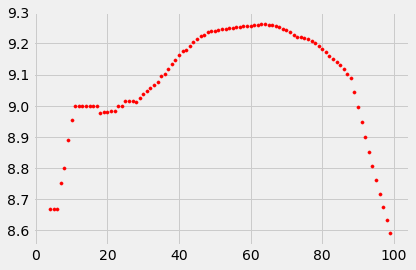

In [24]:
correct=0
total=0
for k in range(4,100):
    for group in test_set:
        for data in test_set[group]:
            vote = K_nearest_neighbours(train_set, data, k)
            if group == vote:
                correct += 1
        total +=1
    plt.scatter(k,(correct/total),s=10,color='r')
plt.show 